# Average met mast data

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt

# Make all plots inline 
%matplotlib inline

import postproengine as ppeng

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load
    
    
def formatTfig(fig,ax):
    ax.set_xlim([300, 301])
    return
ppeng.formatTfig = formatTfig

In [3]:
yamlstring="""
globalattributes:
  verbose: False
  executeorder:
  - linesampler
  - plotcsv
  
linesampler:
- name: metmast_1k
  ncfile: 
  - /gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/metmast_30000.nc
  group: virtualmast
  varnames: ['velocityx', 'velocityy', 'velocityz', 'temperature']
  average:
    tavg: [15000, 16000]
    savefile: ../results/avgmast_1000.csv
- name: metmast_120
  ncfile: 
  - /gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/metmast_30000.nc
  group: virtualmast
  varnames: ['velocityx', 'velocityy', 'velocityz', 'temperature']
  average:
    tavg: [15000, 15120]
    savefile: ../results/avgmast_0120.csv
- name: metmast_600
  ncfile: 
  - /gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/metmast_30000.nc
  group: virtualmast
  varnames: ['velocityx', 'velocityy', 'velocityz', 'temperature']
  average:
    tavg: [15000, 15600]
    savefile: ../results/avgmast_0600.csv
    
plotcsv:
# Averaged over 120 seconds
  - name: plotUh
    xlabel: 'U [m/s]'
    ylabel: 'z [m]'
    title: 'Velocity'
    figsize: [5,4]
    legendopts: {'loc':'upper left'}
    figname: avg0120
    axesnum: 0
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/avgmast_0120.csv', 'ycol':'z', 'xcol':'velocityx_avg',  'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'U'}}
    - {'file':'../results/avgmast_0120.csv', 'ycol':'z', 'xcol':'velocityy_avg',  'lineopts':{'color':'r', 'lw':1, 'linestyle':'--', 'label':'V'}}
    - {'file':'../results/avgmast_0120.csv', 'ycol':'z', 'xcol':'', 'xscalefunc':'lambda x:np.array(np.sqrt(x["velocityx_avg"]**2+x["velocityy_avg"]**2))',  'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'$U_h$'}}
  - name: plotWindDir
    xlabel: 'Wind dir [deg]'
    ylabel: 'z [m]'
    title: 'Wind direction'
    figsize: [5,4]
    legendopts: {'loc':'upper left'}
    figname: avg0120
    axesnum: 1
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/avgmast_0120.csv', 'ycol':'z', 'xcol':'', 'xscalefunc':'lambda x:np.array(270-np.arctan2(x["velocityy_avg"], x["velocityx_avg"])*180.0/np.pi)',  
       'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'$\\theta$'}}
  - name: plotT
    xlabel: 'Temperature [K]'
    ylabel: 'z [m]'
    title: 'Temperature'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    figname: avg0120
    axesnum: 2
    postplotfunc: postproengine.formatTfig
    csvfiles:
    - {'file':'../results/avgmast_0120.csv', 'ycol':'z', 'xcol':'temperature_avg', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'T'}}
    savefile: ../results/avgmetmast_0120.png
    
# Averaged over 600 seconds
  - name: plotUh
    xlabel: 'U [m/s]'
    ylabel: 'z [m]'
    title: 'Velocity'
    figsize: [5,4]
    legendopts: {'loc':'upper left'}
    figname: avg0600
    axesnum: 0
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/avgmast_0600.csv', 'ycol':'z', 'xcol':'velocityx_avg',  'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'U'}}
    - {'file':'../results/avgmast_0600.csv', 'ycol':'z', 'xcol':'velocityy_avg',  'lineopts':{'color':'r', 'lw':1, 'linestyle':'--', 'label':'V'}}
    - {'file':'../results/avgmast_0600.csv', 'ycol':'z', 'xcol':'', 'xscalefunc':'lambda x:np.array(np.sqrt(x["velocityx_avg"]**2+x["velocityy_avg"]**2))',  'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'$U_h$'}}
  - name: plotWindDir
    xlabel: 'Wind dir [deg]'
    ylabel: 'z [m]'
    title: 'Wind direction'
    figsize: [5,4]
    legendopts: {'loc':'upper left'}
    figname: avg0600
    axesnum: 1
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/avgmast_0600.csv', 'ycol':'z', 'xcol':'', 'xscalefunc':'lambda x:np.array(270-np.arctan2(x["velocityy_avg"], x["velocityx_avg"])*180.0/np.pi)',  
       'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'$\\theta$'}}
  - name: plotT
    xlabel: 'Temperature [K]'
    ylabel: 'z [m]'
    title: 'Temperature'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    figname: avg0600
    axesnum: 2
    postplotfunc: postproengine.formatTfig
    csvfiles:
    - {'file':'../results/avgmast_0600.csv', 'ycol':'z', 'xcol':'temperature_avg', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'T'}}
    savefile: ../results/avgmetmast_0600.png
    
# Averaged over 1000 seconds
  - name: plotUh
    xlabel: 'U [m/s]'
    ylabel: 'z [m]'
    title: 'Velocity'
    figsize: [5,4]
    legendopts: {'loc':'upper left'}
    figname: avg1000
    axesnum: 0
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/avgmast_1000.csv', 'ycol':'z', 'xcol':'velocityx_avg',  'lineopts':{'color':'g', 'lw':1, 'linestyle':'--', 'label':'U'}}
    - {'file':'../results/avgmast_1000.csv', 'ycol':'z', 'xcol':'velocityy_avg',  'lineopts':{'color':'r', 'lw':1, 'linestyle':'--', 'label':'V'}}
    - {'file':'../results/avgmast_1000.csv', 'ycol':'z', 'xcol':'', 'xscalefunc':'lambda x:np.array(np.sqrt(x["velocityx_avg"]**2+x["velocityy_avg"]**2))',  'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'$U_h$'}}
  - name: plotWindDir
    xlabel: 'Wind dir [deg]'
    ylabel: 'z [m]'
    title: 'Wind direction'
    figsize: [5,4]
    legendopts: {'loc':'upper left'}
    figname: avg1000
    axesnum: 1
    #postplotfunc: plothelper.formatplot
    csvfiles:
    - {'file':'../results/avgmast_1000.csv', 'ycol':'z', 'xcol':'', 'xscalefunc':'lambda x:np.array(270-np.arctan2(x["velocityy_avg"], x["velocityx_avg"])*180.0/np.pi)',  
       'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'$\\theta$'}}
  - name: plotT
    xlabel: 'Temperature [K]'
    ylabel: 'z [m]'
    title: 'Temperature'
    figsize: [5,4]
    legendopts: {'loc':'upper right'}
    figname: avg1000
    axesnum: 2
    postplotfunc: postproengine.formatTfig
    csvfiles:
    - {'file':'../results/avgmast_1000.csv', 'ycol':'z', 'xcol':'temperature_avg', 'lineopts':{'color':'k', 'lw':1, 'linestyle':'-', 'label':'T'}}
    savefile: ../results/avgmetmast_1000.png
"""
f = io.StringIO(yamlstring)
yamldict = Loader(f, **loaderkwargs)

Initialized linesampler
Running linesampler
Initialized average inside linesampler
Executing average
/gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/metmast_30000.nc 2001
[============================================================] 100.0% 
Ncount = 2001

Initialized average inside linesampler
Executing average
/gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/metmast_30000.nc 241
[============================================================] 100.0% 
Ncount = 241

Initialized average inside linesampler
Executing average
/gpfs/lcheung/HFM/exawind-benchmarks/convective_abl/post_processing/metmast_30000.nc 1201
[============================================================] 100.0% 
Ncount = 1201

Initialized plotcsv
Running plotcsv
Saving ../results/avgmetmast_0120.png
Saving ../results/avgmetmast_0600.png
Saving ../results/avgmetmast_1000.png


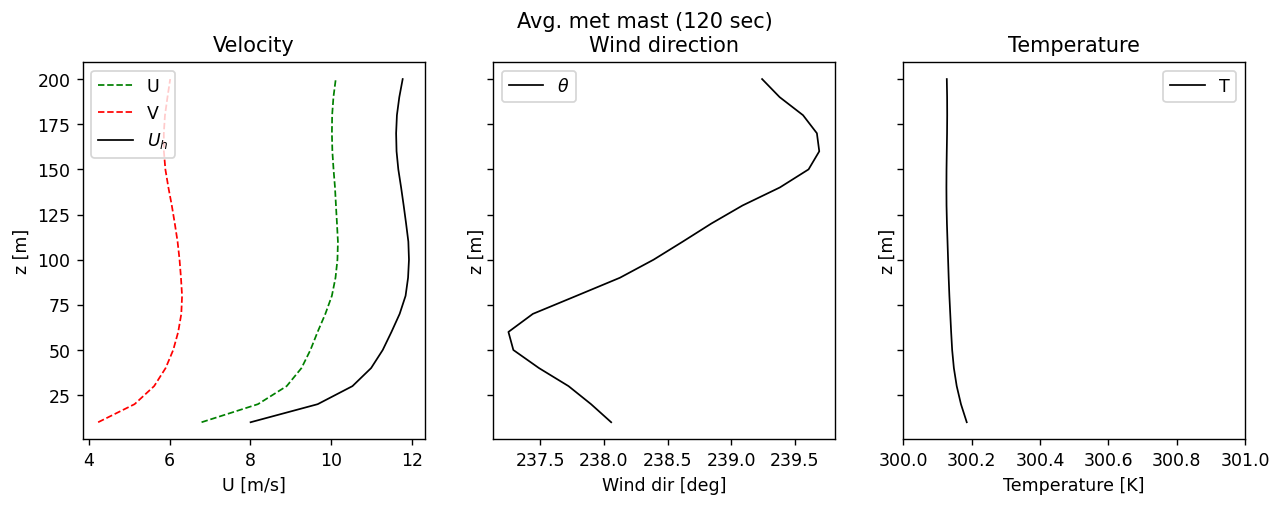

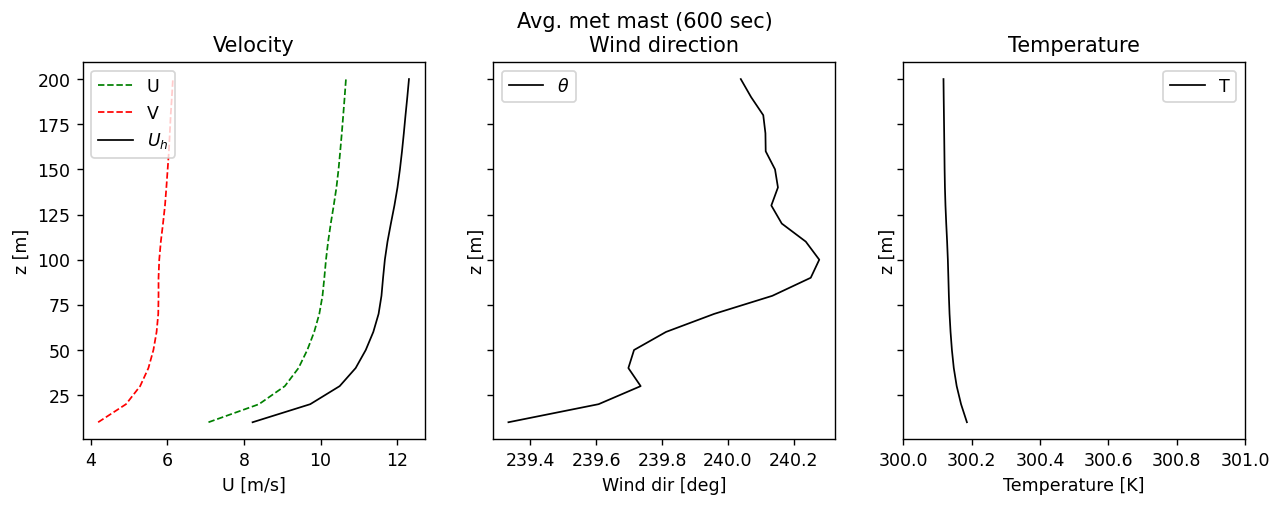

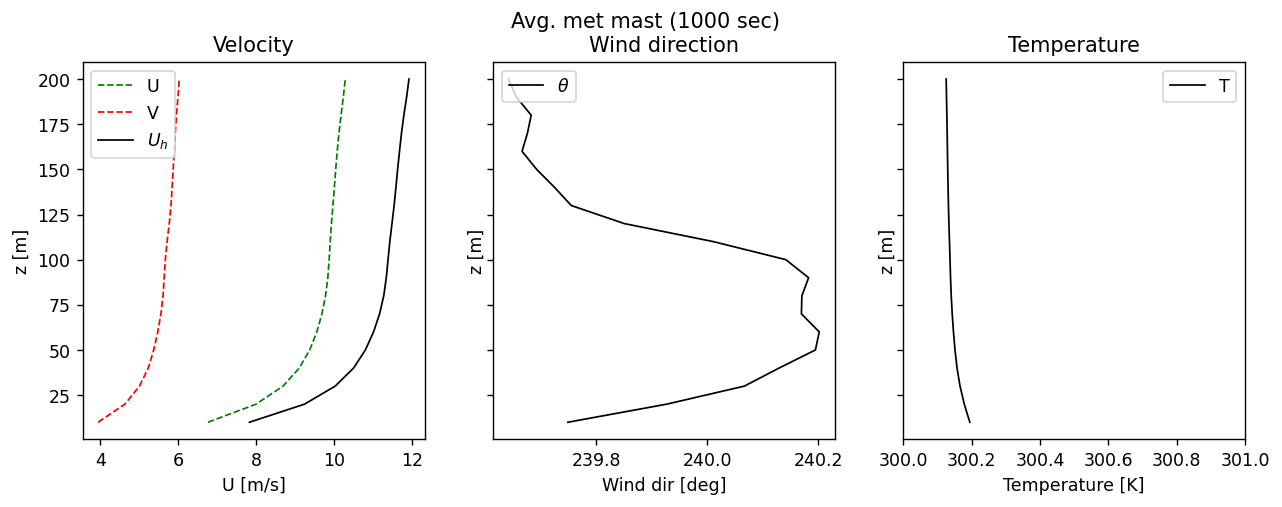

In [4]:
# Run the driver
fig0120, axs = plt.subplots(1,3, figsize=(12,4), dpi=125, num="avg0120", sharey=True)
fig0120.suptitle('Avg. met mast (120 sec)')
fig0600, axs = plt.subplots(1,3, figsize=(12,4), dpi=125, num="avg0600", sharey=True)
fig0600.suptitle('Avg. met mast (600 sec)')
fig1000, axs = plt.subplots(1,3, figsize=(12,4), dpi=125, num="avg1000", sharey=True)
fig1000.suptitle('Avg. met mast (1000 sec)')
ppeng.driver(yamldict, verbose=True)